# Imports

In [1]:
import torch
import platform
import numpy as np

import dlc_practical_prologue as dlc
from torchvision.utils import make_grid

print('Python version <{}>'.format(platform.python_version()))
print('PyTorch version <{}>'.format(torch.__version__))

Python version <3.6.8>
PyTorch version <1.0.1.post2>


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# Data & Constants

In [3]:
from constants import N
print(f'size of training and test sets = {N}')

train_input, train_target, train_classes,\
test_input, test_target, test_classes = dlc.generate_pair_sets(N)
print(f'shape is {train_input.shape}')

size of training and test sets = 1000


/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


shape is torch.Size([1000, 2, 14, 14])


In [4]:
def show_img(img):
    plt.imshow(img)
    plt.show()

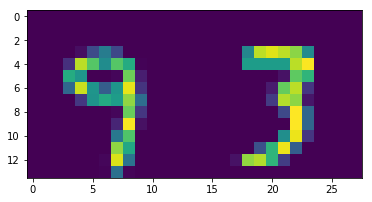

(tensor(0), tensor([9, 3]))

In [5]:
show_img(make_grid(train_input[0].unsqueeze(1), padding=0)[0])
train_target[0], train_classes[0]

# Models Comparison

In [2]:
from torch import nn

from evaluation import evaluate_model
from models import SimpleNN, SimpleCNN

## Only fully connected (baseline) 
(with left and right shared net or not)

Model parameters = 4181


/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/opt/app/projects/DeepLearningProjects/Proj1/models.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  aux_out = torch.cat((F.softmax(out_left), F.softmax(out_right)), dim=1)


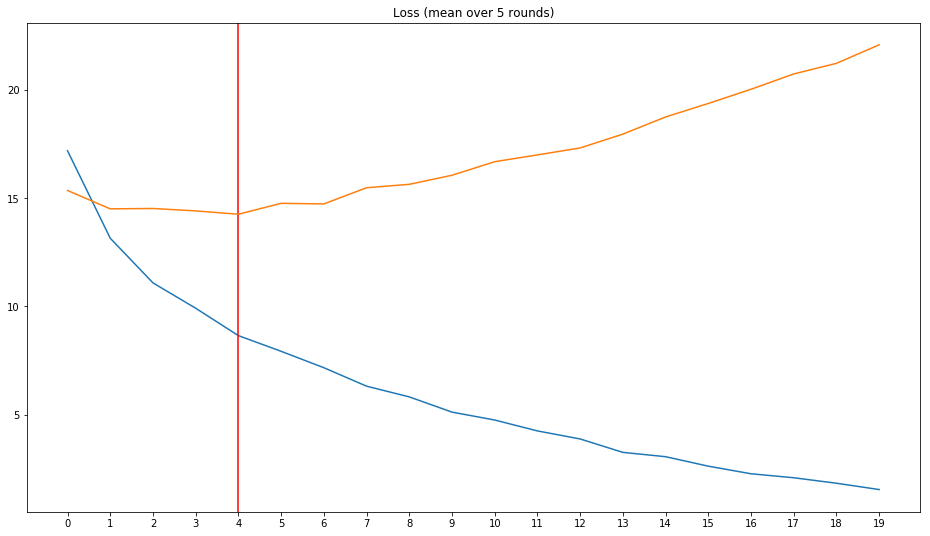

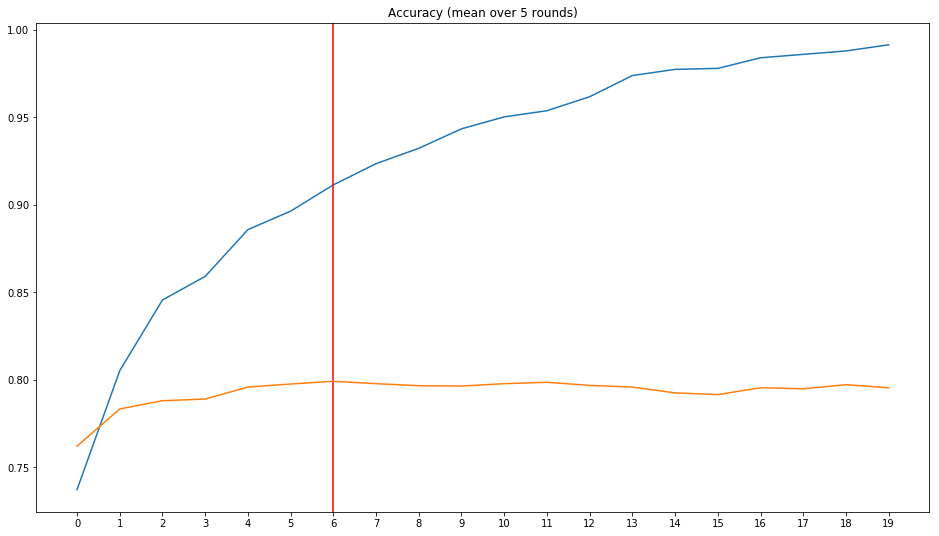

Best validation accuracy (mean over 5 rounds) = 0.7990
Evaluation complete in 0m 9s


In [3]:
evaluate_model(SimpleNN, num_epochs=20, num_rounds=5);

## CNN

Model parameters = 3151


/opt/app/projects/DeepLearningProjects/Proj1/models.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  aux_out = torch.cat((F.softmax(out_left), F.softmax(out_right)), dim=1)


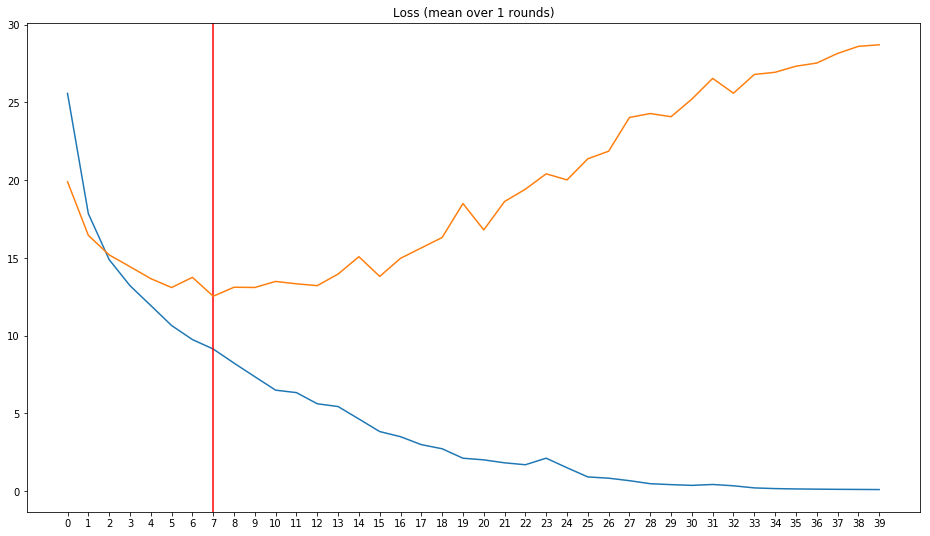

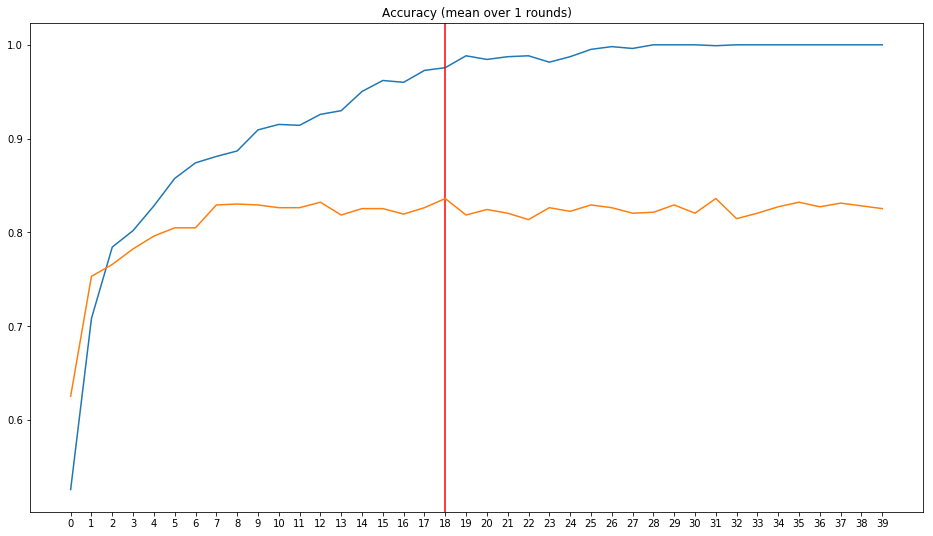

Best validation accuracy (mean over 1 rounds) = 0.8359
Evaluation complete in 0m 52s


In [4]:
evaluate_model(SimpleCNN, num_epochs=40, num_rounds=1);

## Baseline with aux loss

Model parameters = 4181


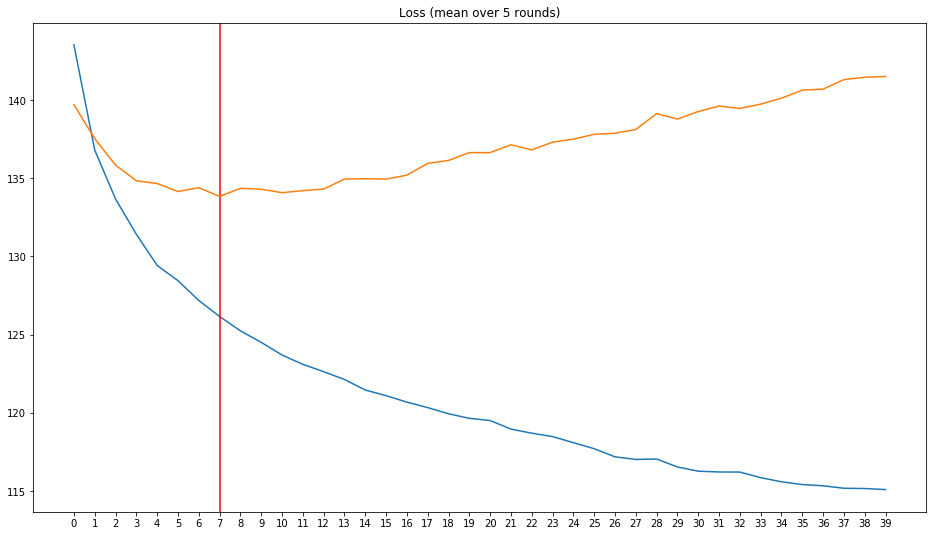

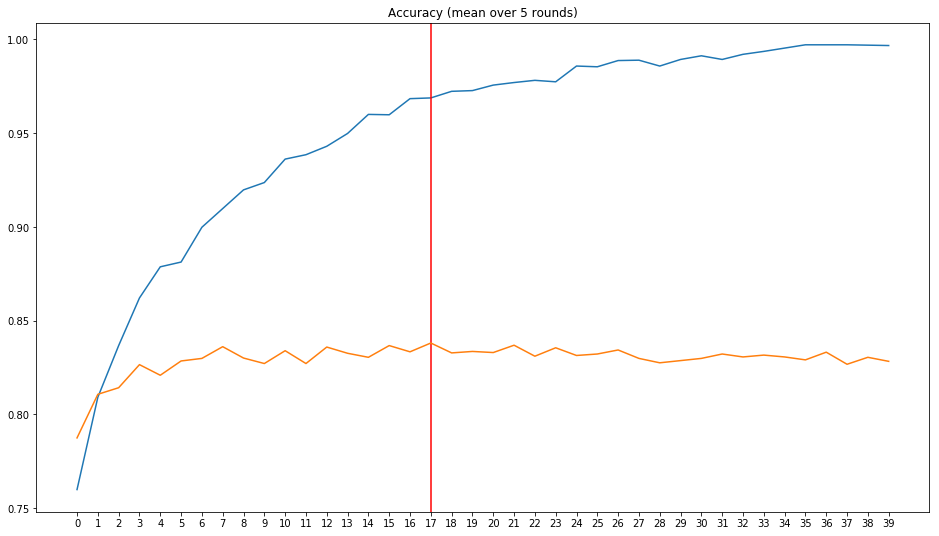

Best validation accuracy (mean over 5 rounds) = 0.8381
Evaluation complete in 0m 21s


In [6]:
evaluate_model(SimpleNN, num_epochs=40, num_rounds=5, with_aux_classes=True);

## CNN with aux loss

Model parameters = 3151


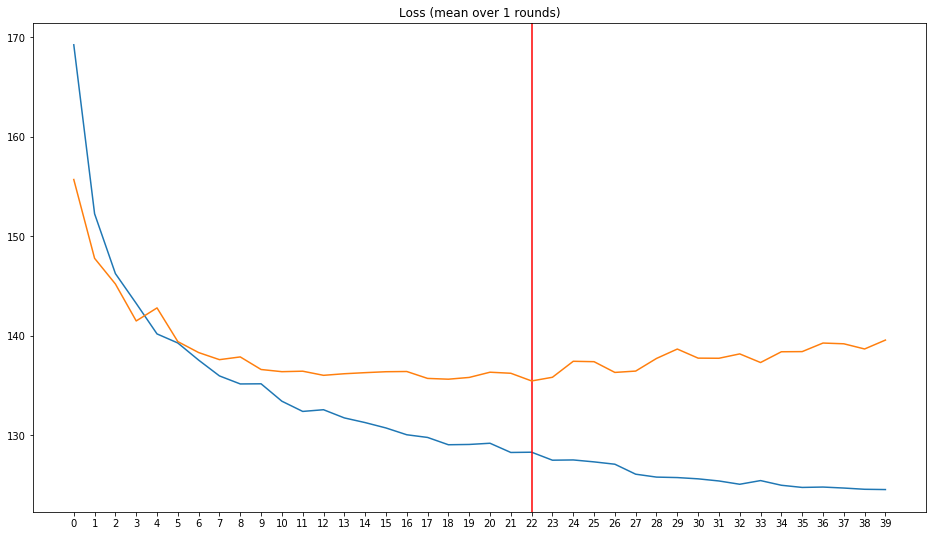

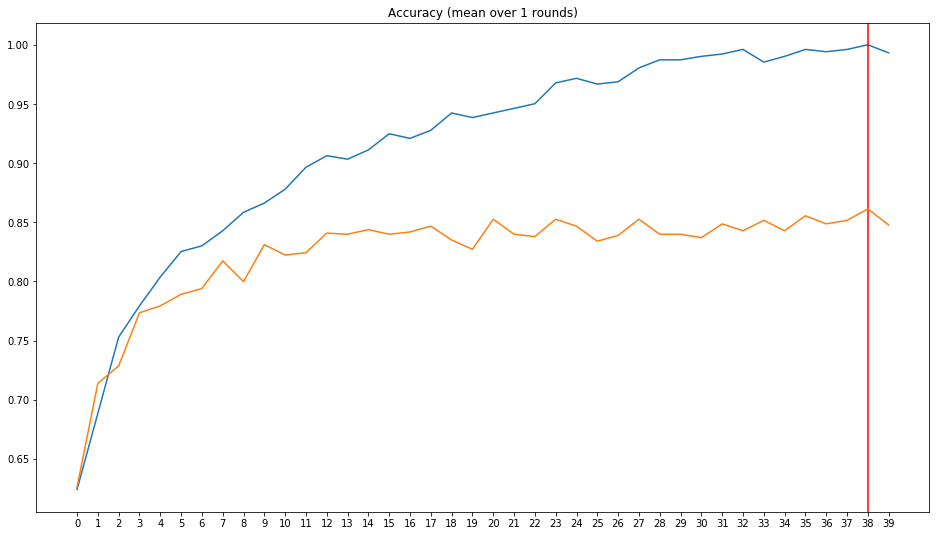

Best validation accuracy (mean over 1 rounds) = 0.8613
Evaluation complete in 0m 53s


In [7]:
evaluate_model(SimpleCNN, num_epochs=40, num_rounds=1, with_aux_classes=True);